## Invert using invert Class

In [28]:
import matplotlib.pyplot as plt
from src.invert_c_theta import Invert
import pandas as pd
import firedrake 
import os

### Invert using C and theta both alternatively

Initialized inversion class

In [29]:
invert_pig = Invert(outline = 'pine-island', mesh_name = 'pig', reg_constant_c = 5, reg_constant_theta = 5, read_mesh = True, drichlet_ids = [1,2,3,4])

Reading outline from icepack database


Plot the mesh created from the geojson file outline

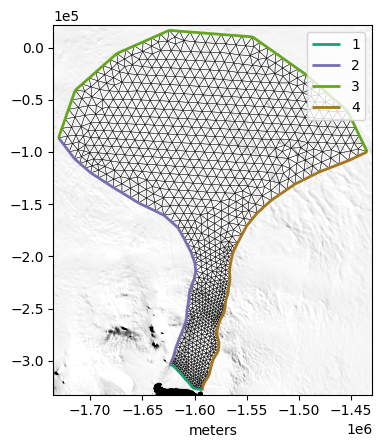

In [30]:
invert_pig.plot_mesh()

Import satelite velocity data (here we use the measures dataset but we can import a custom file if needed)

In [31]:
invert_pig.import_velocity_data()

Reading velocity from measures database


Run simulation using SSA

In [32]:
u = invert_pig.simulation()

Compute error in SSA simulation compared to satellite

In [33]:
firedrake.assemble(invert_pig.loss_functional(u))

2351243.3208428514

Run inversion. First invert C then invert Theta

In [34]:
invert_pig.invert_C_theta_alternate(max_iterations=2, per_variable_iteration = 100)


Truncated CG Trust-Region Solver
  iter  value          gnorm          snorm          delta          #fval     #grad     tr_flag   iterCG    flagCG    
  0     2.351243e+06   1.705262e+02                  2.486947e+04   
  1     4.407105e+05   5.199010e+01   2.486947e+04   2.486947e+04   3         2         0         2         2         
  2     4.407105e+05   5.199010e+01   2.486947e+04   1.554342e+03   4         2         2         2         2         
  3     3.655679e+05   4.448105e+01   1.554342e+03   3.885854e+03   5         3         0         1         3         
  4     2.402010e+05   2.315467e+01   3.885854e+03   9.714636e+03   6         4         0         1         3         
  5     1.086659e+05   6.499405e+00   9.714636e+03   2.428659e+04   7         5         0         2         3         
  6     9.128934e+04   2.483053e+00   2.428659e+04   2.428659e+04   8         6         0         2         2         
  7     9.128934e+04   2.483053e+00   2.428659e+04   1.517912e+0

In [35]:
u_optimized = invert_pig.simulation()

Plot error in optimized solution

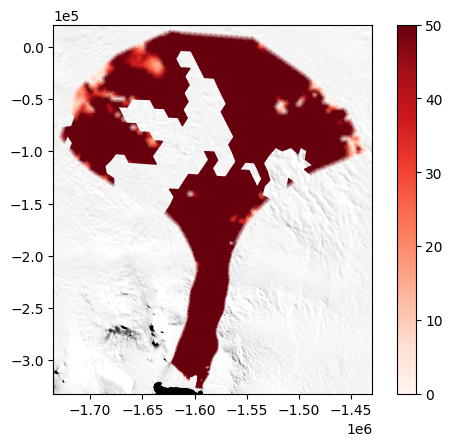

In [36]:
invert_pig.plot_u_error(u_optimized, vmax = 50)

Compute error in optimized SSA simulation compared to satellite

In [37]:
firedrake.assemble(invert_pig.loss_functional(u_optimized))

12383.665579326027

Plot optimized C field

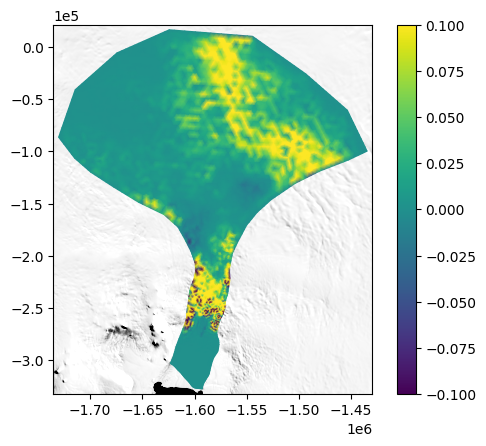

In [41]:
invert_pig.plot_C(vmin = -0.1, vmax= 0.1)

Plot optimized Theta field

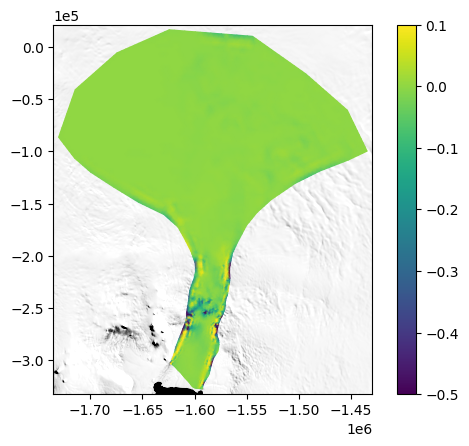

In [42]:
invert_pig.plot_theta(vmin = -0.5, vmax= 0.1)

Plot optimized streamlines

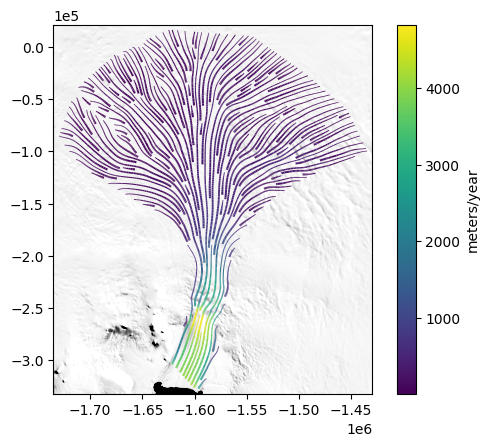

In [18]:
invert_pig.plot_streamline_u(u_optimized)

Save optimized fields

In [12]:
# Save to Checkpoint File
mesh = invert_pig.get_mesh()
theta = invert_pig.get_theta()
C = invert_pig.get_C()
checkpoint_file_path = os.path.join(folder_path, 'new_reg_variables_c5_t5.h5')
with firedrake.CheckpointFile(checkpoint_file_path, 'w') as afile:
    if afile is not None:
        afile.save_mesh(mesh)  # optional
        afile.save_function(u_optimized, name='u_optimized')
        afile.save_function(theta, name='theta')
        afile.save_function(C, name='C')
    else:
        print("Failed to create checkpoint file.")

Save optimized fields as pandas dataframe

In [29]:
df = invert_pig.get_dataframe(u_optimized)
df.to_csv('new_compute_C_theta_C_optimized.csv')

#### Invert using C and theta both simultaneously

Initialize inversion class

In [19]:
invert_pig = Invert(outline = 'pine-island', mesh_name = 'pig', reg_constant_c = 5, reg_constant_theta = 5, read_mesh = True, drichlet_ids = [1,2,3,4])

Reading outline from icepack database


Import satelite velocity data (here we use the measures dataset but we can import a custom file if needed)

In [20]:
invert_pig.import_velocity_data()

Reading velocity from measures database


Run inversion. Invert C and Theta at once

In [21]:
invert_pig.invert_C_theta_simultaneously(max_iterations=100)


Truncated CG Trust-Region Solver
  iter  value          gnorm          snorm          delta          #fval     #grad     tr_flag   iterCG    flagCG    
  0     2.351243e+06   2.571205e+02                  1.214697e+04   
  1     5.134187e+05   7.305125e+01   1.214697e+04   3.036743e+04   3         2         0         2         3         
  2     8.681774e+04   8.007638e+00   3.036743e+04   3.036743e+04   4         3         0         2         3         
  3     5.842425e+04   4.176596e+00   3.036743e+04   3.036743e+04   5         4         0         3         3         
  4     5.842425e+04   4.176596e+00   3.036743e+04   1.897964e+03   6         4         2         4         2         
  5     5.262208e+04   2.333101e+00   1.897964e+03   4.744911e+03   7         5         0         1         3         
  6     4.612108e+04   1.214711e+00   4.744911e+03   1.186228e+04   8         6         0         2         3         
  7     4.612108e+04   1.214711e+00   1.186228e+04   7.413924e+0

Plot optimized C and theta

In [22]:
u_optimized = invert_pig.simulation()

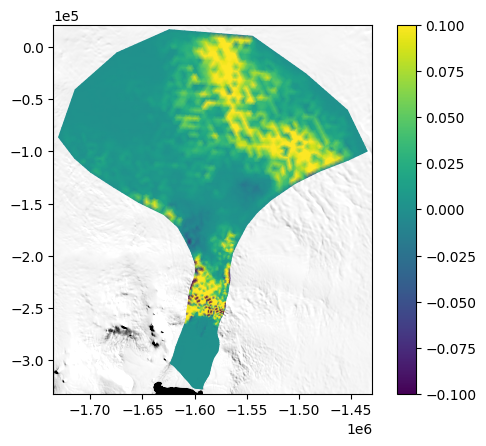

In [23]:
invert_pig.plot_C(vmin = -0.1, vmax = 0.1)

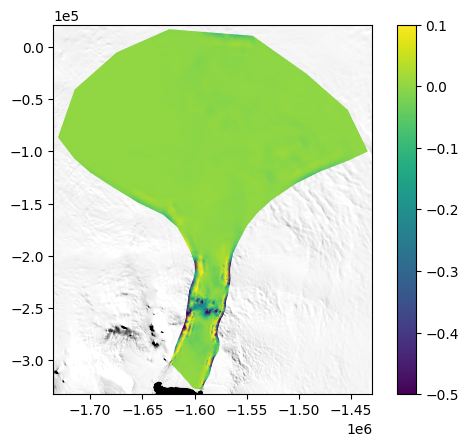

In [24]:
invert_pig.plot_theta(vmin = -0.5, vmax = 0.1)

Plot error

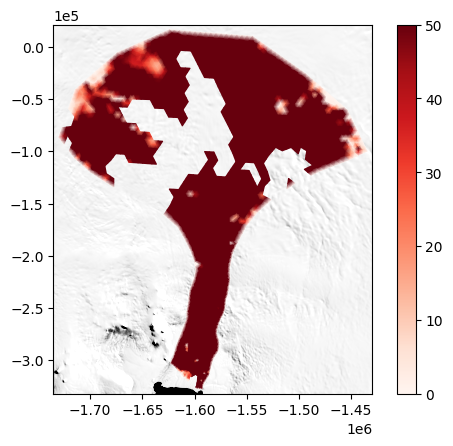

In [25]:
invert_pig.plot_u_error(u_optimized, vmax = 50)

In [26]:
firedrake.assemble(invert_pig.loss_functional(u_optimized))

13334.298577761268

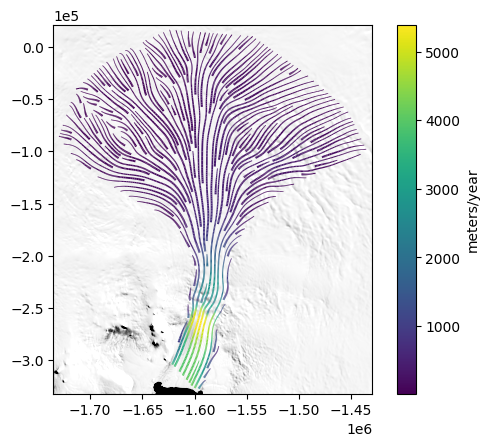

In [27]:
invert_pig.plot_streamline_u(u_optimized)

Save variables

In [27]:
# Save to Checkpoint File
mesh = invert_pig.get_mesh()
theta = invert_pig.get_theta()
C = invert_pig.get_C()
checkpoint_file_path = os.path.join(folder_path, 'new_reg_variables_c5_t5_simultaneous.h5')
with firedrake.CheckpointFile(checkpoint_file_path, 'w') as afile:
    if afile is not None:
        afile.save_mesh(mesh)  # optional
        afile.save_function(u_optimized, name='u_optimized')
        afile.save_function(theta, name='theta')
        afile.save_function(C, name='C')
    else:
        print("Failed to create checkpoint file.")

In [28]:
df = invert_pig.get_dataframe(u_optimized)

In [30]:
df.to_csv('new_compute_C_theta_C_optimized_simultaneous.csv')